1. Data Ingesiton

2. Eda of the data

3. processing of the data

4. model building

5. model evalution

# Data Ingestion

Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Set the datetime column as the index of the dataframe.

Check the datatype of the index and convert it to datetime if necessary.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [7]:
data=pd.read_csv("TSLA.CSV")

In [9]:
#univariate analysis
stock_data=data[["Date","Close"]]

In [10]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [15]:
stock_data["Date"]=pd.to_datetime(stock_data.Date)

/tmp/ipykernel_70/3739671253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"]=pd.to_datetime(stock_data.Date)


In [17]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [19]:
stock_data = stock_data.set_index("Date")

In [20]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


# Eda of dataset

# why we are converting date column as a index column

1. i can easily retrive the data
2. visulization is also simple
3. those lib has been degine in such a way it required date column as a index(scipy statsmodel)

# EDA(exploratory data analysis)

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [21]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


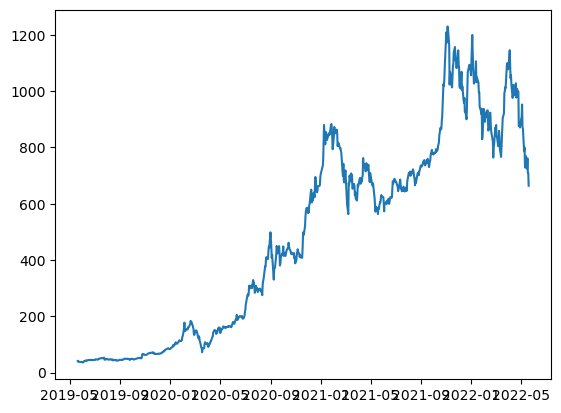

In [22]:
plt.plot(stock_data.Close)

In [24]:
stock_data.head(5)

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

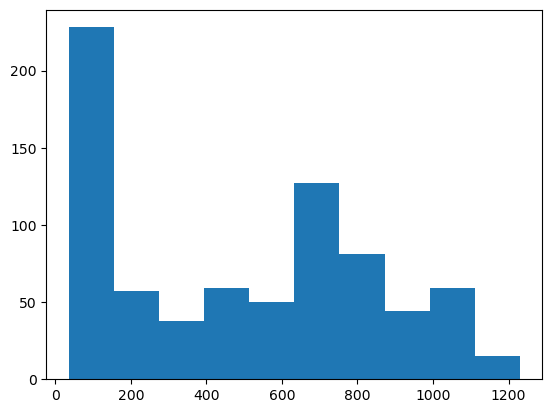

In [25]:
plt.hist(stock_data.Close)

/tmp/ipykernel_70/1231653583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data.Close)


<AxesSubplot: xlabel='Close', ylabel='Density'>

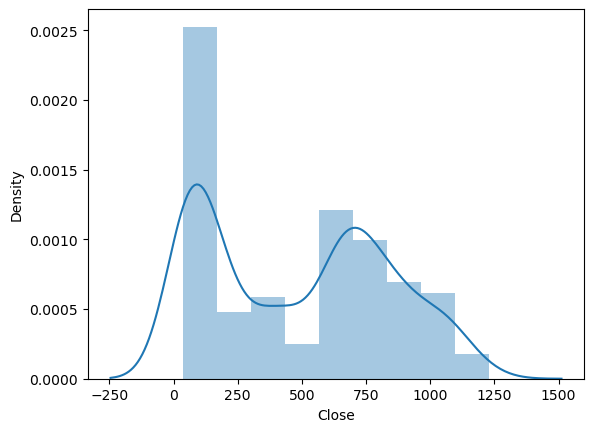

In [28]:
import seaborn as sns
sns.distplot(stock_data.Close)

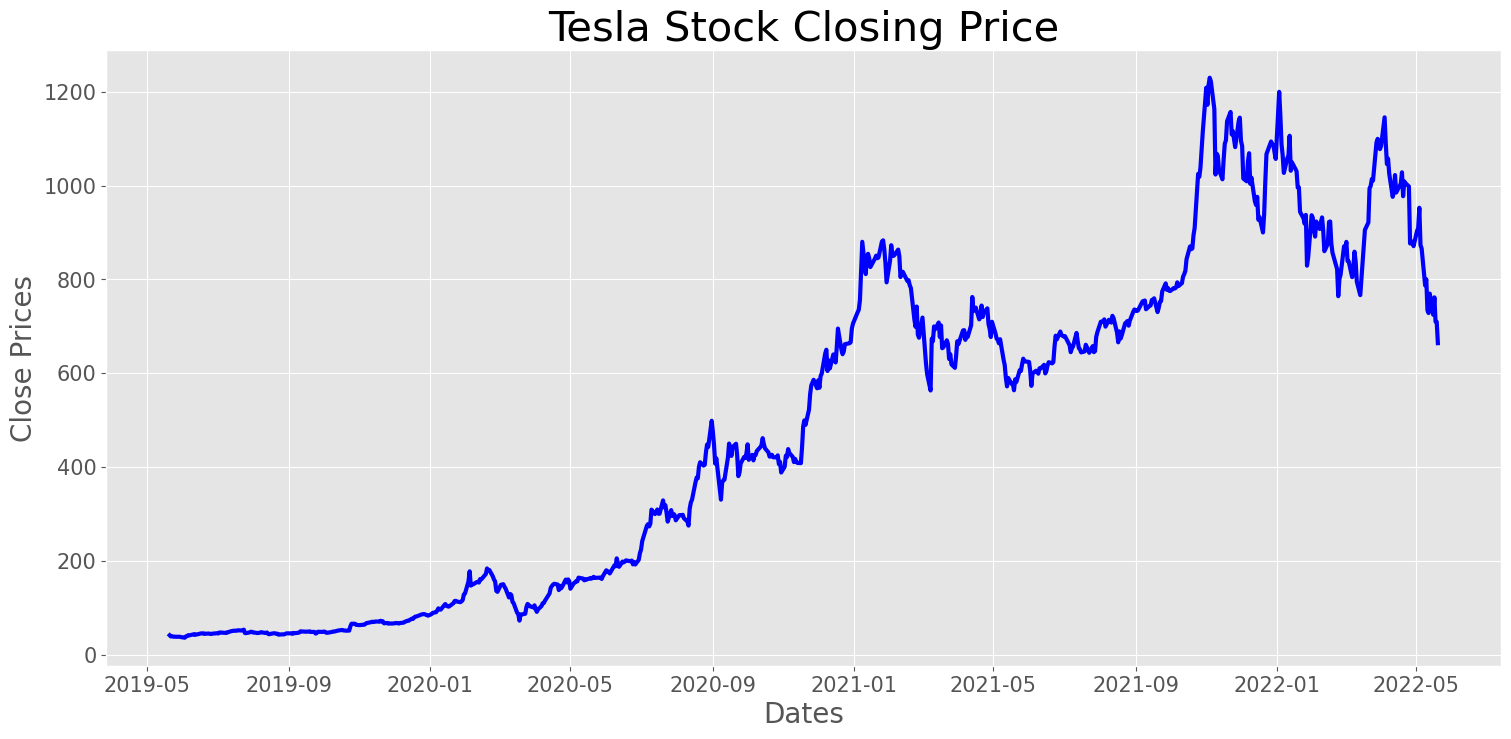

In [29]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

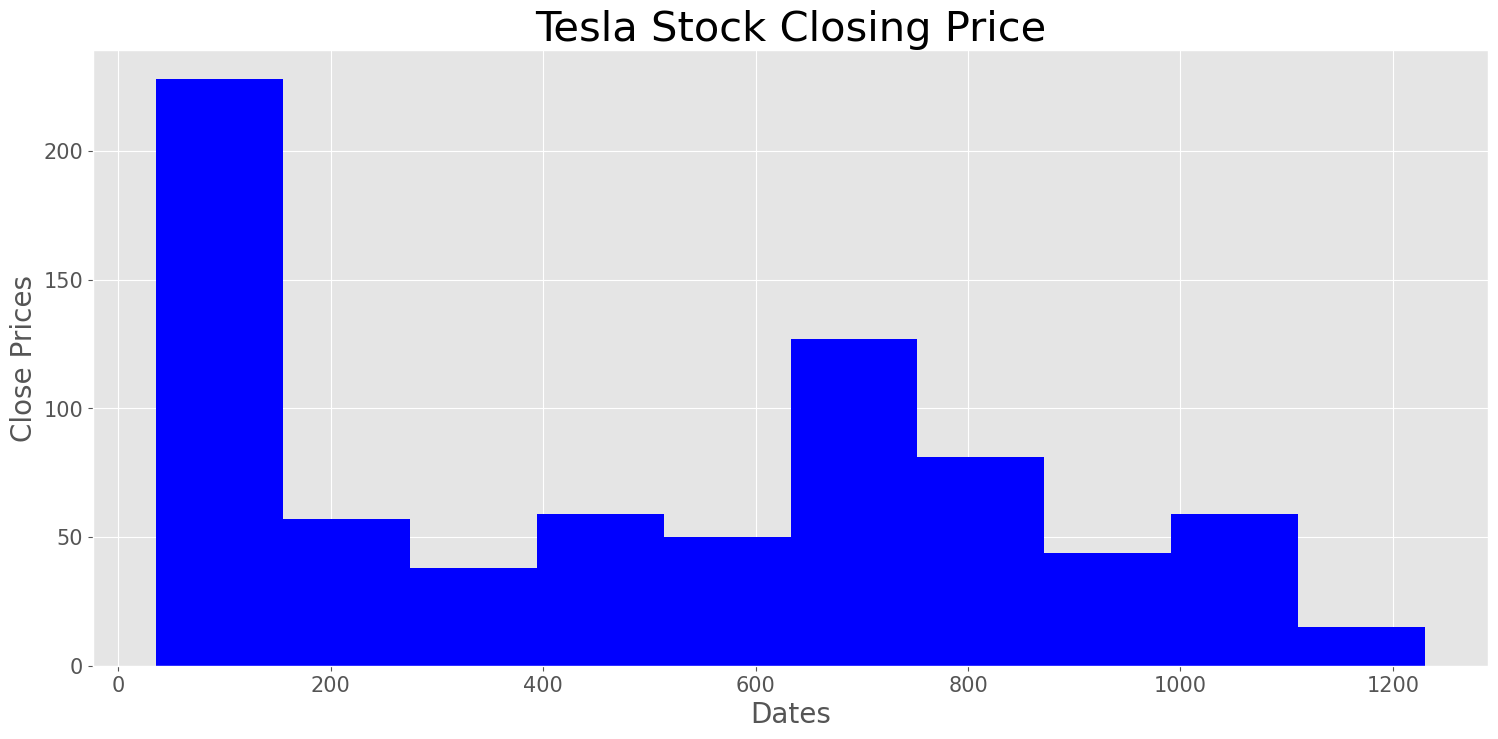

In [30]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

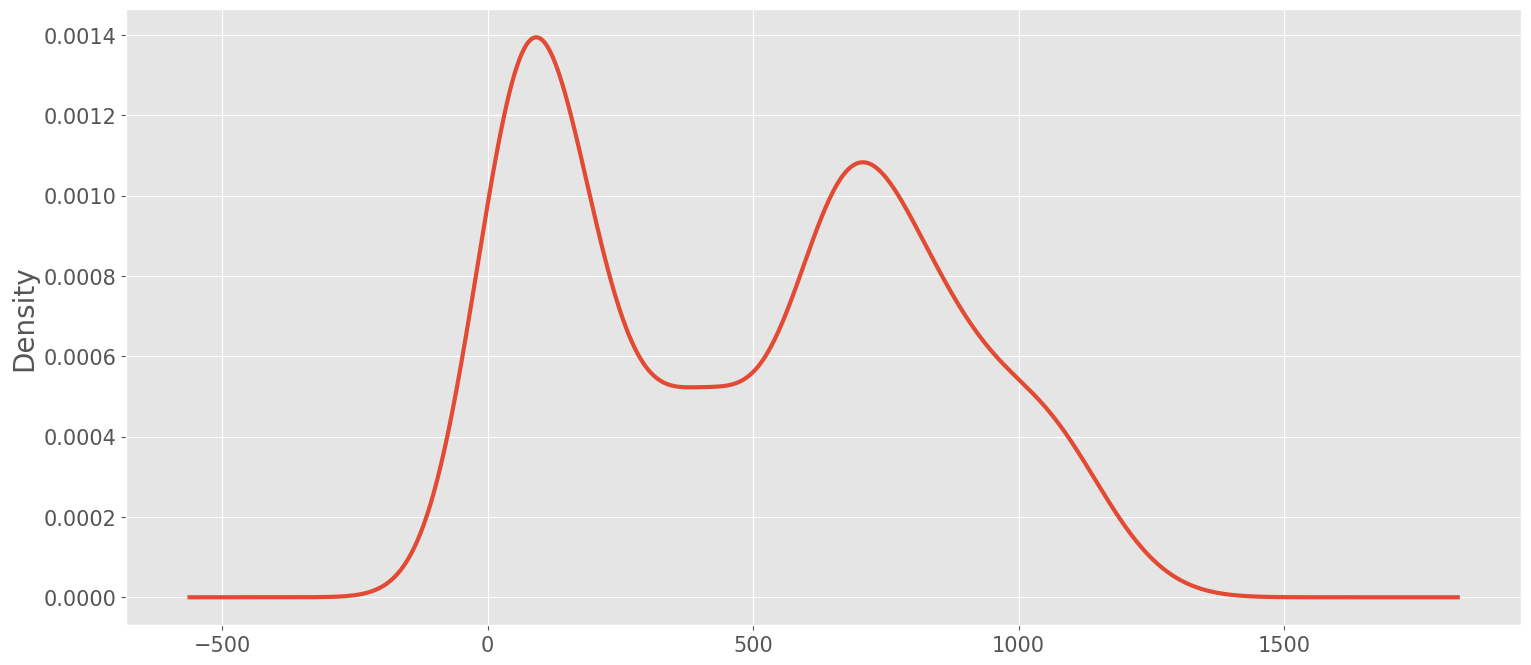

In [31]:
# Distribution of the close price
df_close = stock_data['Close']
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [32]:
rolmean=stock_data["Close"].rolling(48).mean()

In [33]:
rolstd=stock_data["Close"].rolling(48).std()

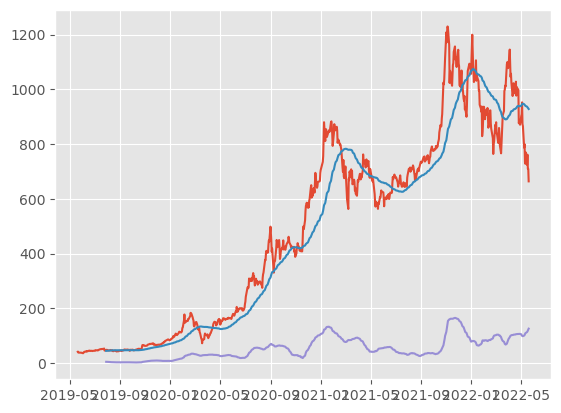

In [35]:
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [36]:
#ADF(ada fullar test)
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])

In [37]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


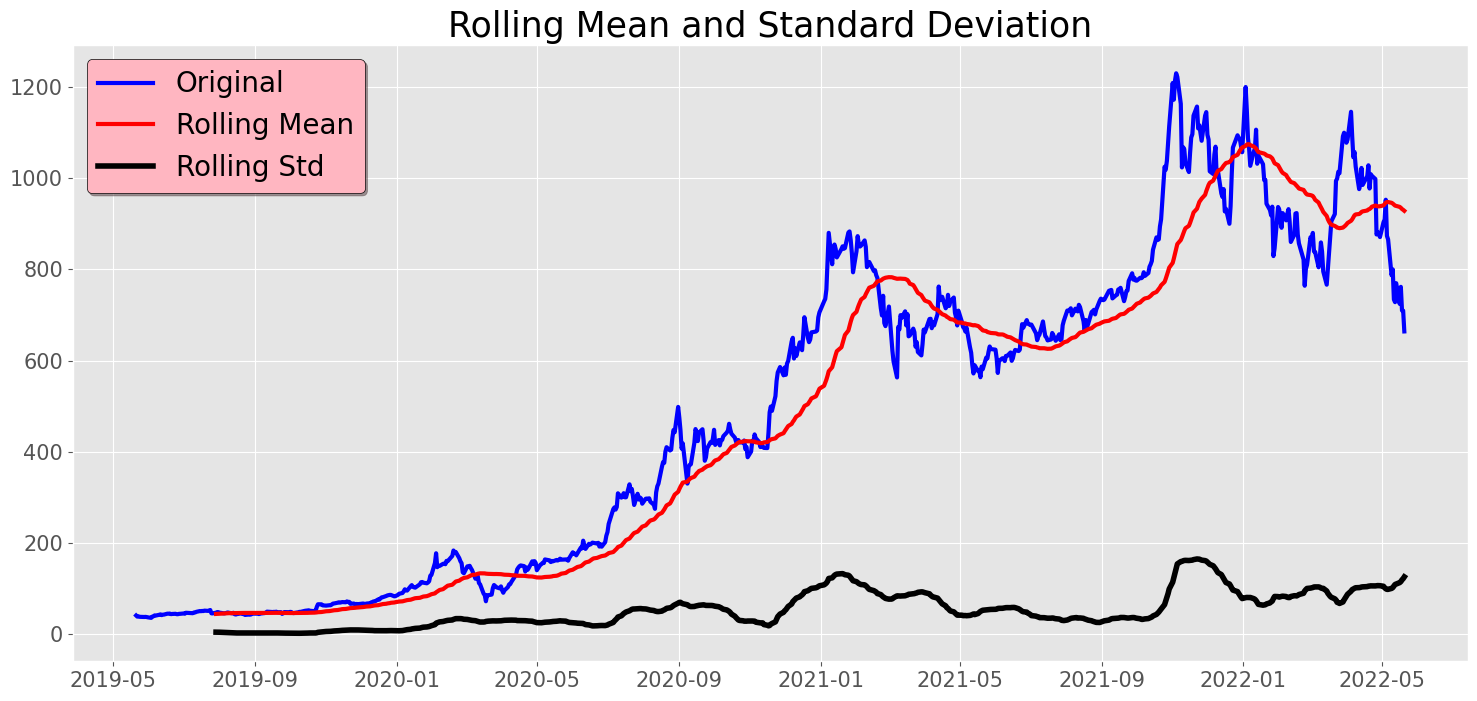

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [38]:
test_stationarity(stock_data.Close)

In [39]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data.Close)

In [40]:
adft

(-1.36300858170375,
 0.5998762543050691,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [41]:
pd.Series(adft[0:4],index=["test stats","p value","lag","data points"])

test stats      -1.363009
p value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

<AxesSubplot: >

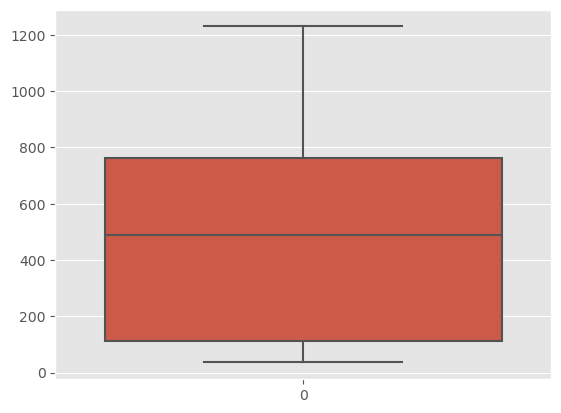

In [42]:
sns.boxplot(stock_data.Close)

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[["Close"]],period=12)

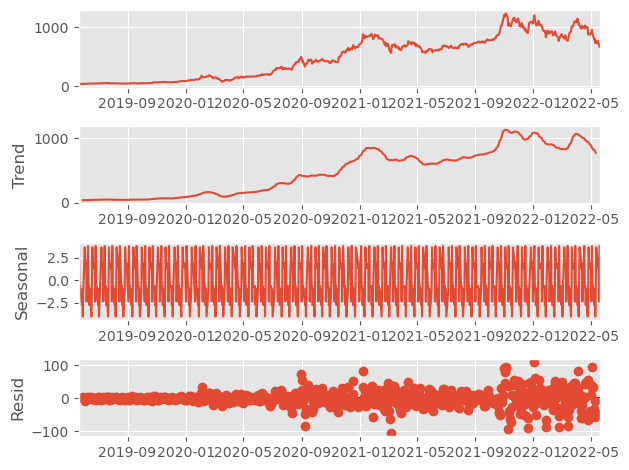

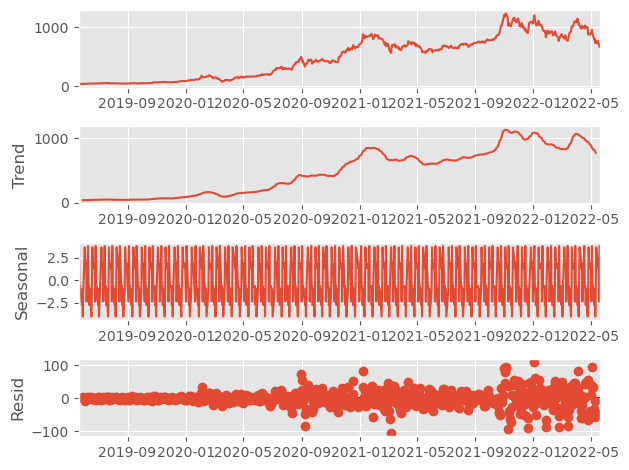

In [45]:
result.plot()

In [47]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


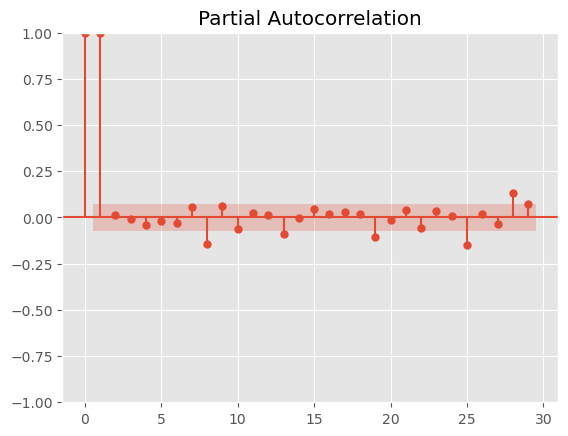

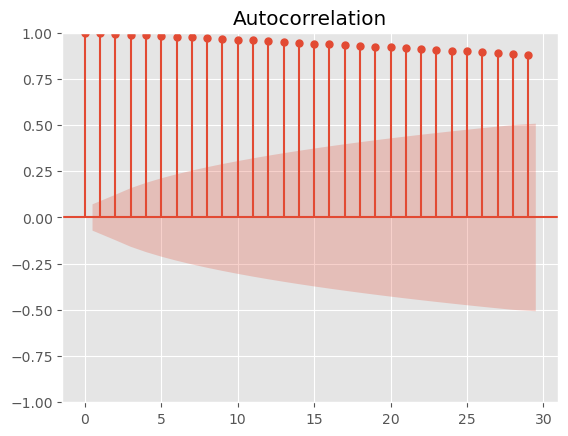

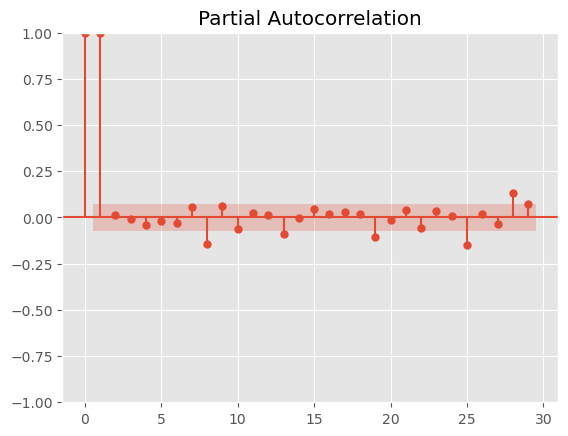

In [49]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

# Preprocessing of the data

1. fill the miss(here not required)

2. convert data into the stationary Time Series

3. if necessary then normalize the data(here not required )

4. split the data into train and test

5. clean the data by removing the outlier(here not required)

In [51]:
df_close = stock_data["Close"]

In [52]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [58]:
df_close = df_close.diff()
df_close = df_close.dropna()

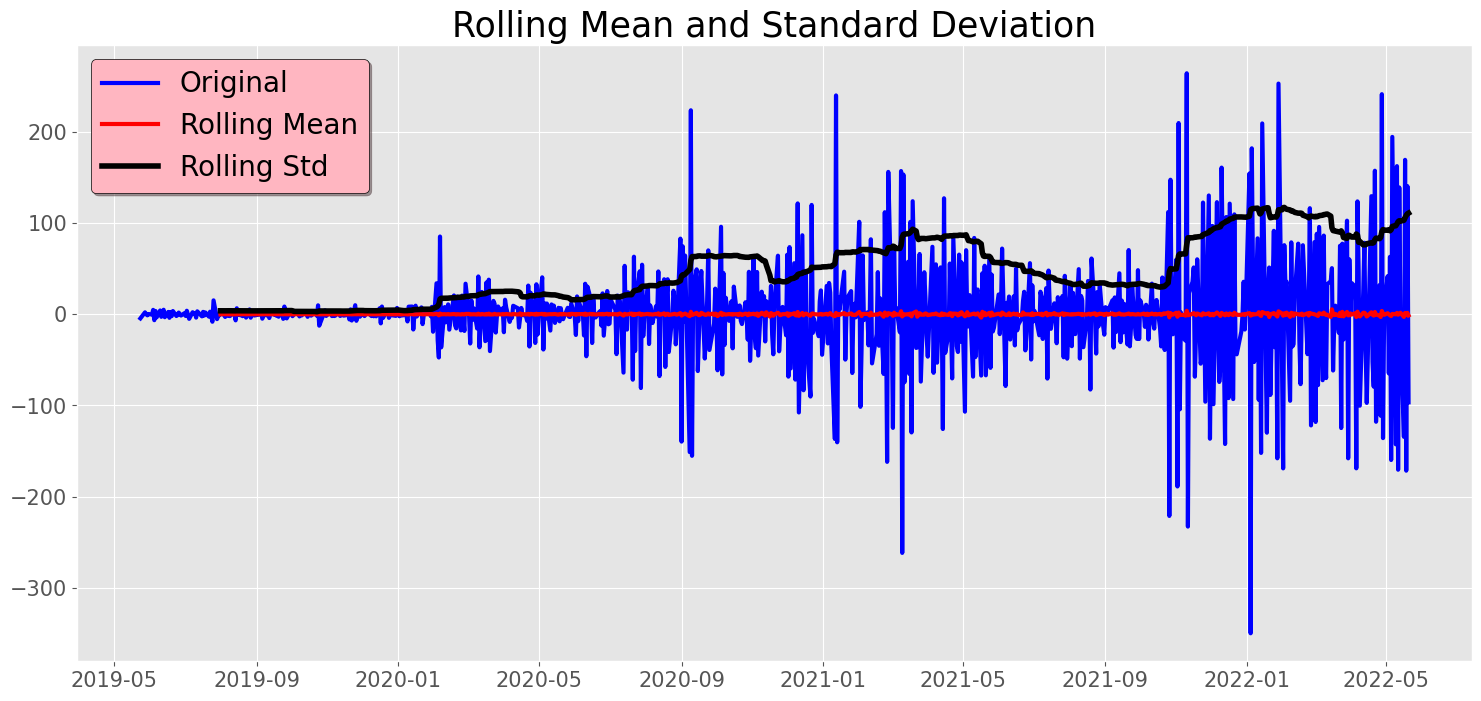

Results of dickey fuller test
Test Statistics               -1.311785e+01
p-value                        1.585467e-24
No. of lags used               2.000000e+01
Number of observations used    7.340000e+02
critical value (1%)           -3.439290e+00
critical value (5%)           -2.865486e+00
critical value (10%)          -2.568871e+00
dtype: float64


In [59]:
test_stationarity(df_close)

In [60]:
df_close[0:-60]

Date
2019-05-24     -4.545994
2019-05-28      2.110001
2019-05-29      0.031994
2019-05-30     -1.177994
2019-05-31      0.275997
                 ...    
2022-02-17     -2.290100
2022-02-18     75.670105
2022-02-22    -43.750000
2022-02-23     -5.960144
2022-02-24    116.260193
Name: Close, Length: 695, dtype: float64

In [61]:
df_close[-60:]

Date
2022-02-25   -121.850159
2022-02-28     79.090088
2022-03-01   -118.080017
2022-03-02     88.200012
2022-03-03    -77.700073
2022-03-04     95.720093
2022-03-07    -72.309998
2022-03-08     86.239929
2022-03-09    -38.780029
2022-03-10    -69.989868
2022-03-11     32.959900
2022-03-14     36.250061
2022-03-15     50.529968
2022-03-16    -61.680054
2022-03-17     -9.789917
2022-03-18      9.390015
2022-03-21    -20.440125
2022-03-22     75.070129
2022-03-23   -124.740051
2022-03-24     77.369995
2022-03-25    -27.769958
2022-03-28    102.569885
2022-03-29   -157.949890
2022-03-30     60.160034
2022-03-31      2.499878
2022-04-01     34.190063
2022-04-04     30.489990
2022-04-05   -168.919922
2022-04-06    123.739868
2022-04-07     48.310059
2022-04-08   -100.270020
2022-04-11     25.480042
2022-04-12     78.369995
2022-04-13    -36.180054
2022-04-14    -97.189941
2022-04-18    129.449951
2022-04-19    -52.089905
2022-04-20    -79.380127
2022-04-21    157.340088
2022-04-22   -117.84

In [ ]:
# SPLIT DATA INTO TRAIN AND TRAINING SET 
train_data = df_close[0:-60]
train_data = df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(train_data,'green',label='Train data', linewidth = 5)
plt.plot(test_data,'blue',label='Train data', linewidth = 5)
plt.legend(fontsize = 20, shadow= True,facecolor = 'lightpink',edgecolor = '')
plt.show()